<a href="https://colab.research.google.com/github/devzohaib/Roman-urdu-sentiment-/blob/master/Logistic_Regression_with_custom_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import matplotlib.pyplot as plt 
import numpy as np



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Seperation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_project_Maam_Satwat /dataset.csv')
# removing NA 
df.dropna(axis=0,inplace=True)

positive_df = df[df['Encode_Sentiment'] == 1.0]
negative_df = df[df['Encode_Sentiment'] == 2.0]
neutral_df = df[df['Encode_Sentiment'] == 0.0]

# empty list to extract txt from dataframe
all_positive_txt = []
all_negative_txt = []
all_neutral_txt = []

# helper function 
def DataFrameToList_po(x):
  all_positive_txt.append(str(x))

def DataFrameToList_ne(x):
  all_negative_txt.append(str(x))

def DataFrameToList_nu(x):
  all_neutral_txt.append(str(x))

# Converting DataFrame to list --- Postive Sentence
positive_df['Text'].apply(DataFrameToList_po)

# Dataframe to list --- Negative Sentence 
negative_df['Text'].apply(DataFrameToList_ne)

# Dataframe to list -- Neutral Sentence
neutral_df['Text'].apply(DataFrameToList_nu)


2        None
3        None
5        None
8        None
11       None
         ... 
34543    None
34886    None
34899    None
34903    None
34906    None
Name: Text, Length: 13214, dtype: object

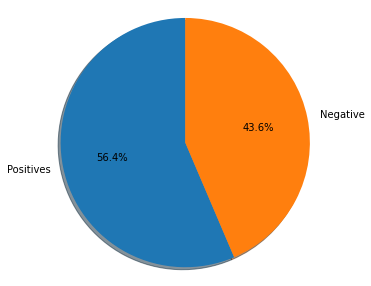

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_txt), len(all_negative_txt)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# Helper function 

In [ ]:
def process_txt(sample):
  # lower caseing the input
  sample = sample.lower()
  # removing everytieverything except alpalphabet 
  result = re.sub(r'[^a-zA-Z]'," " , sample)
  # fixing extra spaces
  sp_fix = re.sub(' +',' ',result)
  # tokenizing the sentence
  tokens = word_tokenize(sp_fix)
  return tokens

def build_freqs(dataset, labels):
    yslist = np.squeeze(labels).tolist()
    freqs = {}
    for y, sentence in zip(yslist, dataset):
        for word in process_txt(sentence):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

def extract_features(sentence, freqs):
    word_l = process_txt(sentence)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in word_l:
        x[0,1] += freqs.get((word, 1.0),0)
        x[0,2] += freqs.get((word, 0.0),0)
    assert(x.shape == (1, 3))
    return x

def sigmoid(z): 
    h = 1/(1+np.exp(-z))
    return h

def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]
    for i in range(0, num_iters):
        # get z, the dot product of x and theta
        z = x @ theta
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1./m)*(y.T @ np.log(h) + (1-y).T @ np.log(1-h))

        # update the weights theta
        theta = theta - (alpha/m)*(x.T @ (h-y))
    J = float(J)
    return J, theta

# Data Spliting

In [ ]:
print(len(all_positive_txt))
print(len(all_negative_txt))


# split the data into two pieces
test_pos = all_positive_txt[9000:]
train_pos = all_positive_txt[:9000]

test_neg = all_negative_txt[6500:]
train_neg = all_negative_txt[:6500]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

print("test_pos    ",len(test_pos))
print("train_pos   ",len(train_pos))
print("test_neg    ",len(test_neg))
print("trian_neg   ",len(train_neg))
print("trian_x     ",len(train_x))
print("test_x      ",len(test_x))

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y  = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

12230
9447
test_pos     3230
train_pos    9000
test_neg     2947
trian_neg    6500
trian_x      15500
test_x       6177
train_y.shape = (15500, 1)
test_y.shape = (6177, 1)


In [ ]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))
print(freqs)

type(freqs) = <class 'dict'>
len(freqs) = 38668
{('shukar', 1.0): 28, ('hay', 1.0): 219, ('australia', 1.0): 12, ('jeeta', 1.0): 24, ('mjhy', 1.0): 11, ('pta', 1.0): 27, ('tha', 1.0): 527, ('k', 1.0): 1480, ('aus', 1.0): 4, ('hi', 1.0): 615, ('jeety', 1.0): 9, ('ga', 1.0): 328, ('p', 1.0): 152, ('chalo', 1.0): 23, ('chod', 1.0): 2, ('diya', 1.0): 154, ('jao', 1.0): 28, ('kush', 1.0): 14, ('raho', 1.0): 41, ('mehrbani', 1.0): 7, ('apki', 1.0): 77, ('sherrry', 1.0): 1, ('khush', 1.0): 140, ('bus', 1.0): 52, ('jazakallaahu', 1.0): 2, ('khaer', 1.0): 2, ('aap', 1.0): 536, ('ki', 1.0): 3073, ('duaen', 1.0): 5, ('saath', 1.0): 33, ('hongi', 1.0): 7, ('tu', 1.0): 190, ('insha', 1.0): 32, ('allaah', 1.0): 8, ('aisa', 1.0): 69, ('rahega', 1.0): 6, ('yaar', 1.0): 45, ('dil', 1.0): 152, ('rakhney', 1.0): 1, ('liye', 1.0): 394, ('boldetey', 1.0): 1, ('tussi', 1.0): 1, ('gr', 1.0): 9, ('ho', 1.0): 898, ('g', 1.0): 189, ('thnko', 1.0): 2, ('shnko', 1.0): 1, ('d', 1.0): 178, ('kia', 1.0): 243, ('baat

In [ ]:
# test the function 
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_txt(train_x[0]))

tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

This is an example of a positive tweet: 
 Shukar hay Australia jeeta:)

This is an example of the processed version of the tweet: 
 ['shukar', 'hay', 'australia', 'jeeta']
[[  1. 283. 201.]]


# Features Extraction

In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y


# Training

In [ ]:
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 5000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.64700116.
The resulting vector of weights is [2.5e-07, 0.00027072, -0.00034256]


In [ ]:

def predict_txt(sentence, freqs, theta):
    x = extract_features(sentence,freqs)
    y_pred = sigmoid(np.dot(x,theta))
    return y_pred
def test_logistic_regression(test_x, test_y, freqs, theta):
    # the list for storing predictions
    y_hat = []
    for sentence in test_x:
        # get the label prediction for the tweet
        y_pred = predict_txt(sentence, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
 
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)    
    return accuracy

In [ ]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.6984
